In [20]:
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import cmocean.cm as cm
import seaborn as sns
from scipy.stats import mannwhitneyu, ks_2samp
plt.style.use("ggplot")

In [21]:
ds_open = xr.open_dataset("../data/open/fields_biogem_3d.nc")
ds_close = xr.open_dataset("../data/closed/fields_biogem_3d.nc")

In [22]:
lon_open = ds_open["lon"].to_numpy()
lat_open = ds_open["lat"].to_numpy()
rho_open = ds_open["phys_ocn_rho"].isel(time=0, zt=0)

lon_close = ds_close["lon"].to_numpy()
lat_close = ds_close["lat"].to_numpy()
rho_close = ds_close["phys_ocn_rho"].isel(time=0, zt=0)

rho_anom = rho_close - rho_open

In [26]:
mean_value = rho_open.mean().values
print(f"Mean values: {mean_value}\n")

print("#####################################################\n")

median_value = rho_open.median().values
print(f"Median values: {median_value}\n")

print("#####################################################\n")

max_value = rho_open.max().values
print(f"Max values: {max_value}\n")
print(rho_open.where(rho_open == max_value, drop=True).coords.values())

print("#####################################################\n")

min_value = rho_open.min().values
print(f"Min values: {min_value}\n")
print(rho_open.where(rho_open == min_value, drop=True).coords.values())

Mean values: 1025.36962890625

#####################################################

Median values: 1025.149169921875

#####################################################

Max values: 1027.7960205078125

ValuesView(Coordinates:
    time     float64 1e+04
  * lon      (lon) float64 -85.0
  * lat      (lat) float64 -66.44
    zt       float64 40.42)
#####################################################

Min values: 1022.1595458984375

ValuesView(Coordinates:
    time     float64 1e+04
  * lon      (lon) float64 -235.0
  * lat      (lat) float64 -1.592
    zt       float64 40.42)


In [27]:
mean_value = rho_close.mean().values
print(f"Mean values: {mean_value}\n")

print("#####################################################\n")

median_value = rho_close.median().values
print(f"Median values: {median_value}\n")

print("#####################################################\n")

max_value = rho_close.max().values
print(f"Max values: {max_value}\n")
print(rho_close.where(rho_close == max_value, drop=True).coords.values())

print("#####################################################\n")

min_value = rho_close.min().values
print(f"Min values: {min_value}\n")
print(rho_close.where(rho_close == min_value, drop=True).coords.values())

Mean values: 1025.373046875

#####################################################

Median values: 1025.154052734375

#####################################################

Max values: 1027.79833984375

ValuesView(Coordinates:
    time     float64 1e+04
  * lon      (lon) float64 -85.0
  * lat      (lat) float64 -66.44
    zt       float64 40.42)
#####################################################

Min values: 1021.6925659179688

ValuesView(Coordinates:
    time     float64 1e+04
  * lon      (lon) float64 -235.0
  * lat      (lat) float64 -1.592
    zt       float64 40.42)


In [28]:
mean_value = rho_anom.mean().values
print(f"Mean values: {mean_value}\n")

print("#####################################################\n")

median_value = rho_anom.median().values
print(f"Median values: {median_value}\n")

print("#####################################################\n")

max_value = rho_anom.max().values
print(f"Max values: {max_value}\n")
print(rho_anom.where(rho_anom == max_value, drop=True).coords.values())

print("#####################################################\n")

min_value = rho_anom.min().values
print(f"Min values: {min_value}\n")
print(rho_anom.where(rho_anom == min_value, drop=True).coords.values())

Mean values: -0.009622327983379364

#####################################################

Median values: -0.029296875

#####################################################

Max values: 0.45086669921875

ValuesView(Coordinates:
    time     float64 1e+04
  * lon      (lon) float64 -215.0
  * lat      (lat) float64 -14.48
    zt       float64 40.42)
#####################################################

Min values: -0.665771484375

ValuesView(Coordinates:
    time     float64 1e+04
  * lon      (lon) float64 -235.0
  * lat      (lat) float64 4.78
    zt       float64 40.42)


In [29]:
rho_open = rho_open.to_numpy()
rho_close = rho_close.to_numpy()
rho_anom = rho_anom.to_numpy()

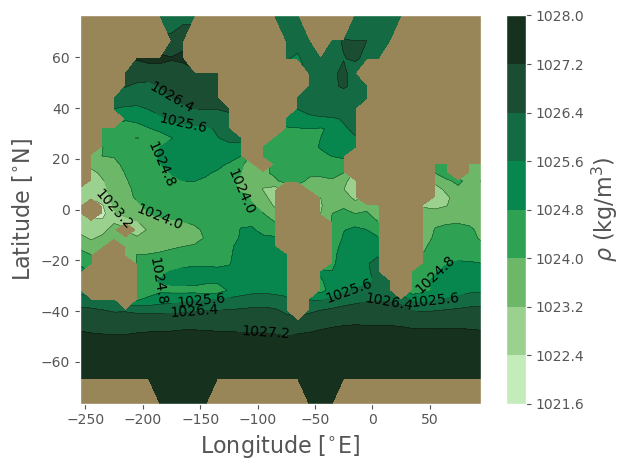

In [30]:
plt.fill_between(lon_open, lat_open.min(), lat_open.max(), 
                 color='#988558');

contour_filled = plt.contourf(lon_open, lat_open,
                              rho_open, cmap=cm.algae);
contour_lines = plt.contour(lon_open, lat_open, rho_open,  
                            colors='k', linewidths=0.2);

plt.xlabel(r"Longitude [$^{\circ}$E]", fontsize=16);
plt.ylabel(r"Latitude [$^{\circ}$N]", fontsize=16);

cbar = plt.colorbar(contour_filled);
cbar.set_label(r"$\rho$ (kg/m$^3$)", fontsize=16);
plt.clabel(contour_lines, inline=True, fontsize=10, fmt='%1.1f'); 

plt.tight_layout();
plt.savefig("../figs/fig1a.png", dpi=600);

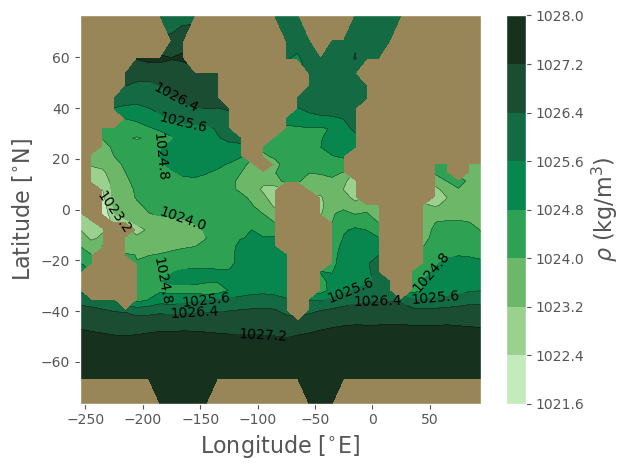

In [31]:
plt.fill_between(lon_close, lat_close.min(), lat_close.max(), color='#988558');
contour_filled = plt.contourf(lon_close, lat_close,
                              rho_close, cmap=cm.algae);
contour_lines = plt.contour(lon_close, lat_close, rho_close, 
                            colors='k', linewidths=0.2);
plt.xlabel(r"Longitude [$^{\circ}$E]", fontsize=16);
plt.ylabel(r"Latitude [$^{\circ}$N]", fontsize=16);
cbar = plt.colorbar(contour_filled);
cbar.set_label(r"$\rho$ (kg/m$^3$)", fontsize=16);
plt.clabel(contour_lines, inline=True, fontsize=10, fmt='%1.1f'); 
plt.tight_layout();
plt.savefig("../figs/fig1b.png", dpi=600);

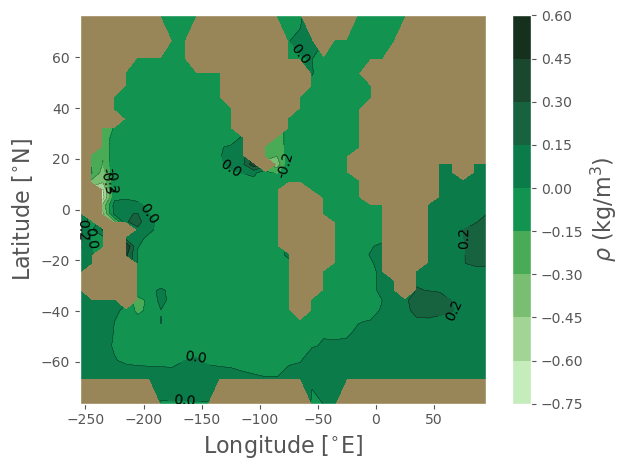

In [32]:
plt.fill_between(lon_close, lat_close.min(), lat_close.max(), color='#988558');
contour_filled = plt.contourf(lon_close, lat_close,
                              rho_anom, cmap=cm.algae);
contour_lines = plt.contour(lon_close, lat_close, rho_anom, 
                            colors='k', linewidths=0.2);
plt.xlabel(r"Longitude [$^{\circ}$E]", fontsize=16);
plt.ylabel(r"Latitude [$^{\circ}$N]", fontsize=16);
cbar = plt.colorbar(contour_filled);
cbar.set_label(r"$\rho$ (kg/m$^3$)", fontsize=16);
plt.clabel(contour_lines, inline=True, fontsize=10, fmt='%1.1f'); 
plt.tight_layout();
plt.savefig("../figs/fig1c.png", dpi=600);

In [33]:
open_rho = rho_open.flatten()
close_rho = rho_close.flatten()

In [34]:
open_rho = open_rho[~(np.isnan(open_rho))]
close_rho = close_rho[~(np.isnan(close_rho))]

/home/ronggolawe/anaconda3/envs/new/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ronggolawe/anaconda3/envs/new/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ronggolawe/anaconda3/envs/new/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


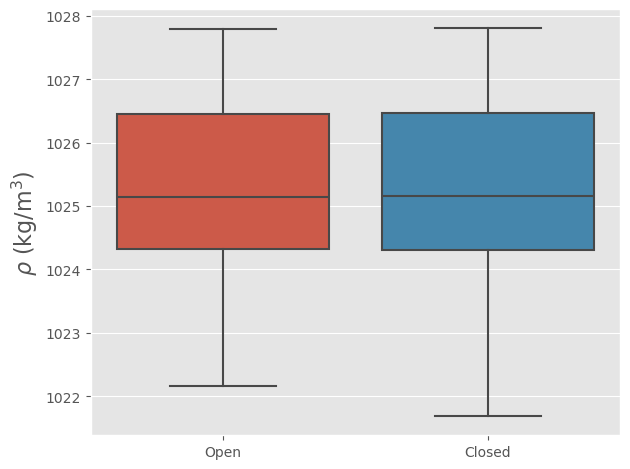

In [35]:
combined_data = np.concatenate([open_rho, close_rho])
grouping_array = np.concatenate([['Open'] * len(open_rho), ['Closed'] * len(close_rho)])
sns.boxplot(x=grouping_array, y=combined_data);
plt.ylabel(r"$\rho$ (kg/m$^3$)", fontsize=16);
plt.tight_layout();
plt.savefig("../figs/fig1d.png", dpi=600);

/home/ronggolawe/anaconda3/envs/new/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ronggolawe/anaconda3/envs/new/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/ronggolawe/anaconda3/envs/new/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ronggolawe/anaconda3/envs/new/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be rem

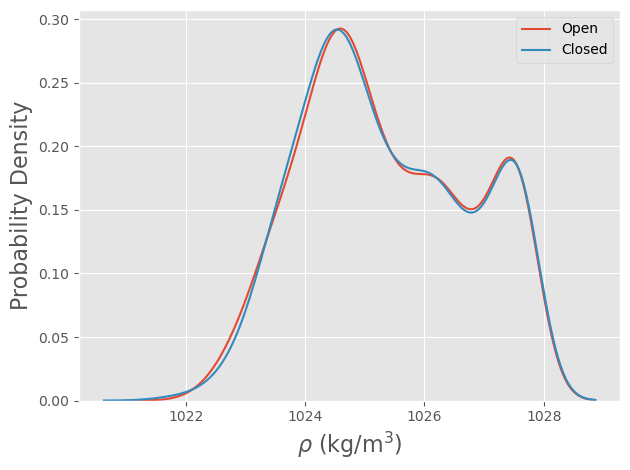

In [36]:
sns.kdeplot(open_rho, label='Open', fill=False);
sns.kdeplot(close_rho, label='Closed', fill=False);
plt.xlabel(r"$\rho$ (kg/m$^3$)", fontsize=16);
plt.ylabel('Probability Density', fontsize=16);
plt.legend();
plt.tight_layout();
plt.savefig("../figs/fig1e.png", dpi=600);

In [37]:
# Mann-Whitney U test
statistic_mw, p_value_mw = mannwhitneyu(open_rho, close_rho)
print(f'Mann-Whitney U test statistic: {round(statistic_mw, 3)}')
print(f'Mann-Whitney U test p-value: {round(p_value_mw, 3)}')

# Interpretation of Mann-Whitney U test
if p_value_mw < 0.05:
    print('The Mann-Whitney U test suggests a significant difference between the distributions of the two arrays.')
else:
    print('The Mann-Whitney U test does not provide enough evidence to reject the null hypothesis of no difference between the distributions.')

# Kolmogorov-Smirnov (KS) test
statistic_ks, p_value_ks = ks_2samp(open_rho, close_rho)
print(f'KS test statistic: {round(statistic_ks, 3)}')
print(f'KS test p-value: {round(p_value_ks, 3)}')

# Interpretation of KS test
if p_value_ks < 0.05:
    print('The KS test suggests a significant difference between the distributions of the two arrays.')
else:
    print('The KS test does not provide enough evidence to reject the null hypothesis of no difference between the distributions.')

Mann-Whitney U test statistic: 428279.0
Mann-Whitney U test p-value: 1.0
The Mann-Whitney U test does not provide enough evidence to reject the null hypothesis of no difference between the distributions.
KS test statistic: 0.021
KS test p-value: 0.984
The KS test does not provide enough evidence to reject the null hypothesis of no difference between the distributions.


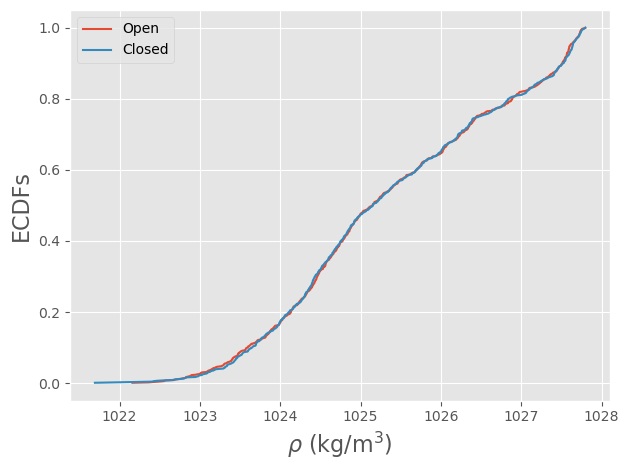

In [38]:
# Calculate ECDFs
def ecdf(data):
    sorted_data = np.sort(data)
    n = len(data)
    y = np.arange(1, n + 1) / n
    return sorted_data, y

x1, y1 = ecdf(open_rho)
x2, y2 = ecdf(close_rho)

# Plot ECDFs
plt.plot(x1, y1, label='Open')
plt.plot(x2, y2, label='Closed')
plt.xlabel(r"$\rho$ (kg/m$^3$)", fontsize=16)
plt.ylabel('ECDFs', fontsize=16)
plt.legend()
plt.tight_layout();
plt.savefig("../figs/fig1f.png", dpi=600);